In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Data Cleaning

In [4]:
# Cleaning column names to remove encoding artifacts
customers.columns = customers.columns.str.strip().str.replace("ï»¿", "")
products.columns = products.columns.str.strip().str.replace("ï»¿", "")
transactions.columns = transactions.columns.str.strip().str.replace("ï»¿", "")

# Converting date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# checking the cleaned data
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272   

# Task-1 Exploratory Data Analysis (EDA) and Business Insights

In [6]:
# Merging datasets for EDA
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

# 1. Customer Distribution by Region

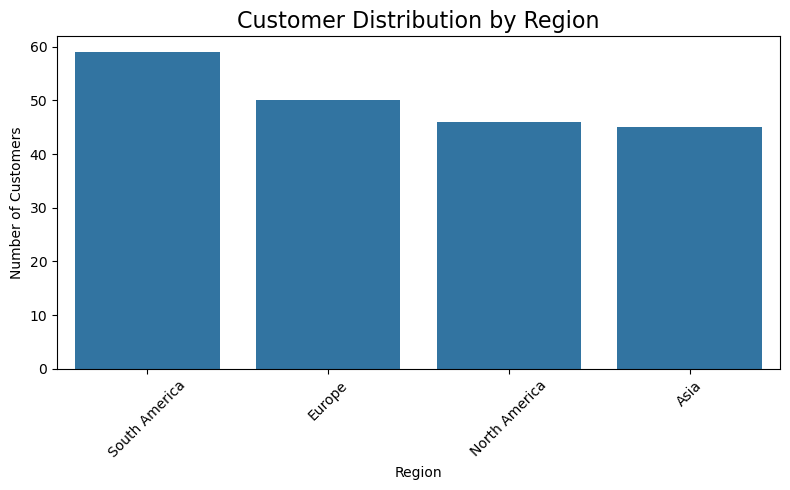

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", order=customers["Region"].value_counts().index)
plt.title("Customer Distribution by Region", fontsize=16)
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Signup Trends Over Time

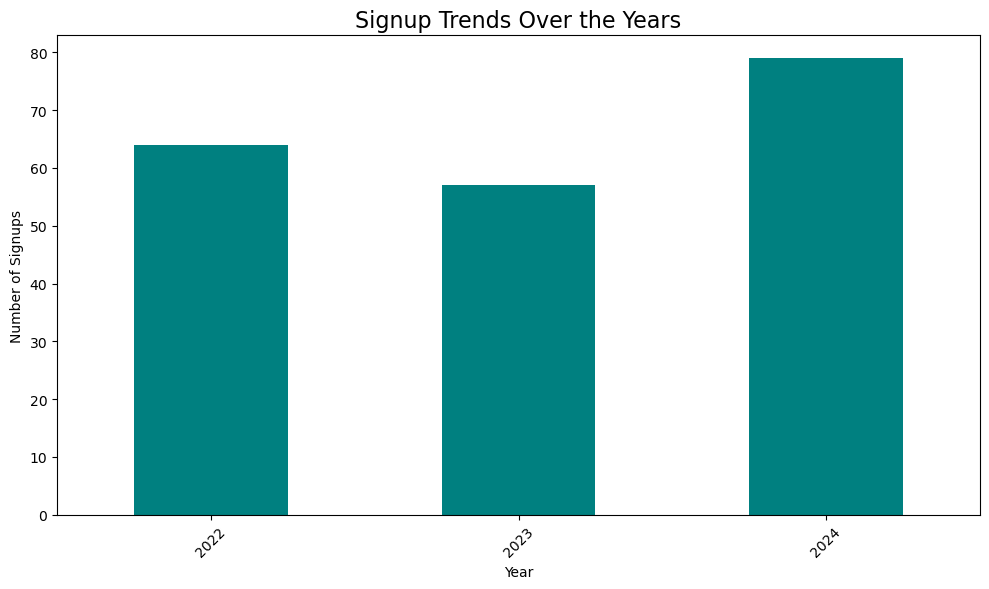

In [17]:
customers["SignupYear"] = customers["SignupDate"].dt.year
signup_trends = customers.groupby("SignupYear").size()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind="bar", color="teal")
plt.title("Signup Trends Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Top-Selling Product Categories by Revenue

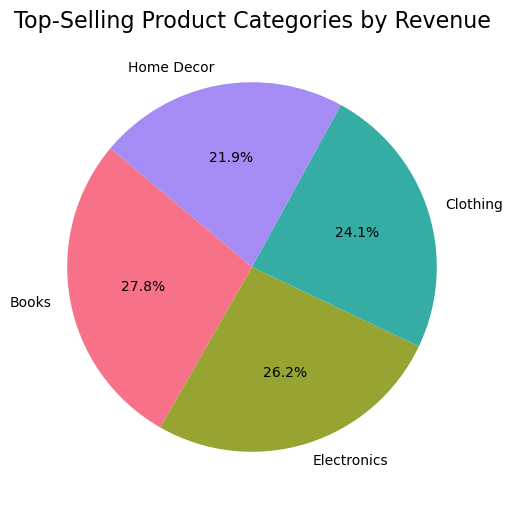

In [20]:
category_sales = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(category_sales)))
plt.title("Top-Selling Product Categories by Revenue", fontsize=16)
plt.ylabel("")
plt.show()

# 4. Transactions Over Time

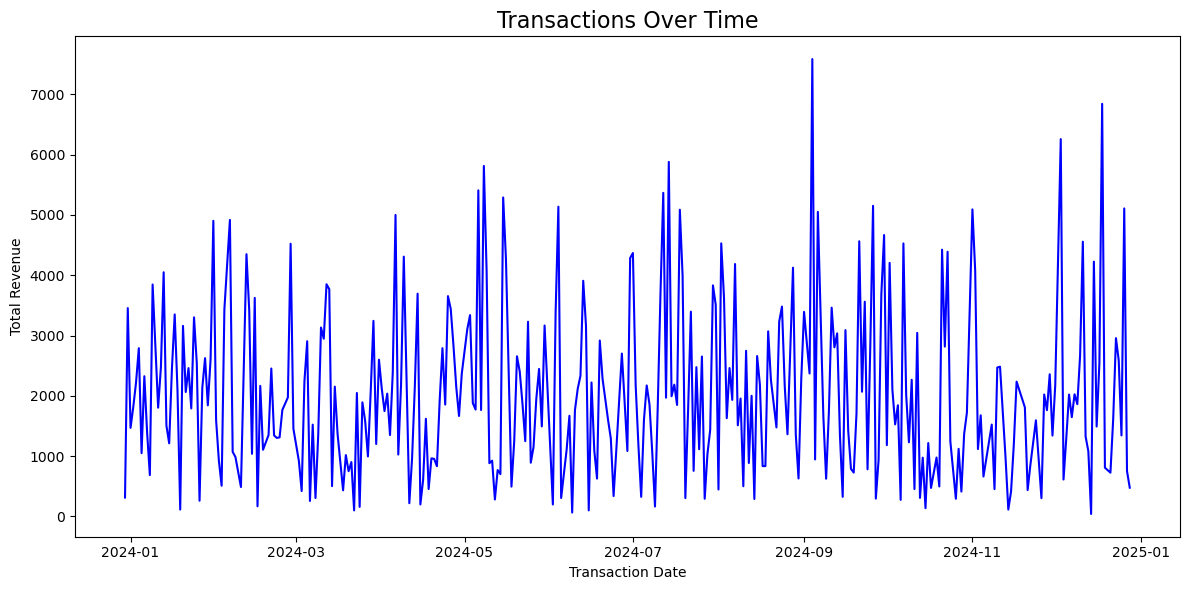

In [21]:
transactions_over_time = merged_data.groupby(merged_data["TransactionDate"].dt.date)["TotalValue"].sum()
plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind="line", color="blue")
plt.title("Transactions Over Time", fontsize=16)
plt.ylabel("Total Revenue")
plt.xlabel("Transaction Date")
plt.tight_layout()
plt.show()

# 5. High-Value Customers

In [25]:
high_value_customers = merged_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 High-Value Customers:\n", high_value_customers)

Top 10 High-Value Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64
